In [1]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# You may change the path per the location of file on your system
database = ("C:/Users/gauri/Downloads/database.sqlite")
conn = sqlite3.connect(database)

In [ ]:
tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", conn)
tables

In [ ]:
res = pd.read_sql("""SELECT COUNT(DISTINCT(PlanId)) AS Plans, Statecode
                    FROM PlanAttributes
                    WHERE BusinessYear = 2016
                    GROUP BY Statecode; """,conn)

plt.figure(figsize=(20,10))
plt.bar(res['StateCode'],res['Plans'])

<BarContainer object of 38 artists>

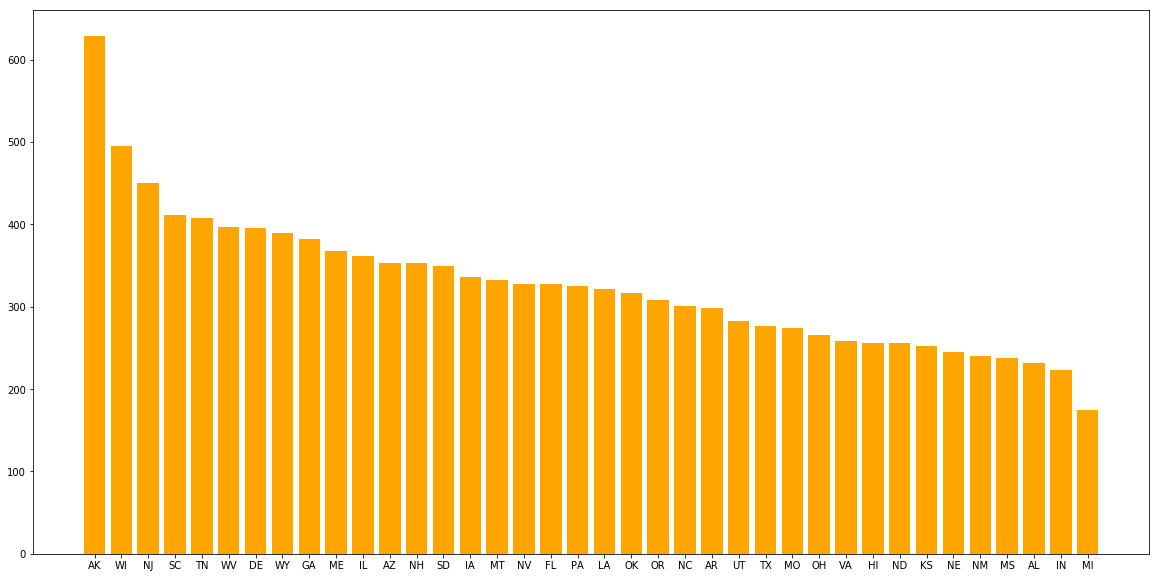

In [36]:
res = pd.read_sql("""select statecode, avg(individualrate) as rate_ave
                        from rate 
                        where businessyear = 2016
                        group by statecode
                        order by rate_ave desc;""", conn)

plt.figure(figsize=(20,10))
plt.bar(res['StateCode'],res['rate_ave'],color="orange")

In [37]:
res = pd.read_sql("""select count(distinct(planid)) as plans, benefitname
                      from benefitscostsharing
                      where businessyear = 2016
                      group by benefitname
                      order by plans desc""", conn)
res

,plans,BenefitName
0,27381,Accidental Dental
1,27381,Basic Dental Care - Adult
2,27381,Basic Dental Care - Child
3,27381,Dental Check-Up for Children
4,27381,Major Dental Care - Adult
5,27381,Major Dental Care - Child
6,27381,Orthodontia - Adult
7,27381,Orthodontia - Child
8,27381,Routine Dental Services (Adult)
9,23544,Treatment for Temporomandibular Joint Disorders


PlanIds across Rate, PlanAttributes and BenefitsCostSharing table are different in the extension '-xx'. For Joins, we will consider the substring without extension.

In [38]:
res = pd.read_sql("""SELECT PlanId FROM Rate LIMIT 5;""", conn)
res

,PlanId
0,21989AK0010001
1,21989AK0020001
2,21989AK0020001
3,21989AK0010001
4,21989AK0010001


In [39]:
res = pd.read_sql("""SELECT PlanId FROM BenefitsCostSharing LIMIT 5;""", conn)
res

,PlanId
0,21989AK0010001-00
1,21989AK0010001-00
2,21989AK0010001-00
3,21989AK0010001-00
4,21989AK0010001-00


In [40]:
res = pd.read_sql("""SELECT PlanId FROM PlanAttributes LIMIT 5;""", conn)
res

,PlanId
0,21989AK0020002-01
1,21989AK0020001-00
2,21989AK0010001-00
3,21989AK0010001-01
4,21989AK0020001-01


Analyzing the dental plan statistics for year 2016:

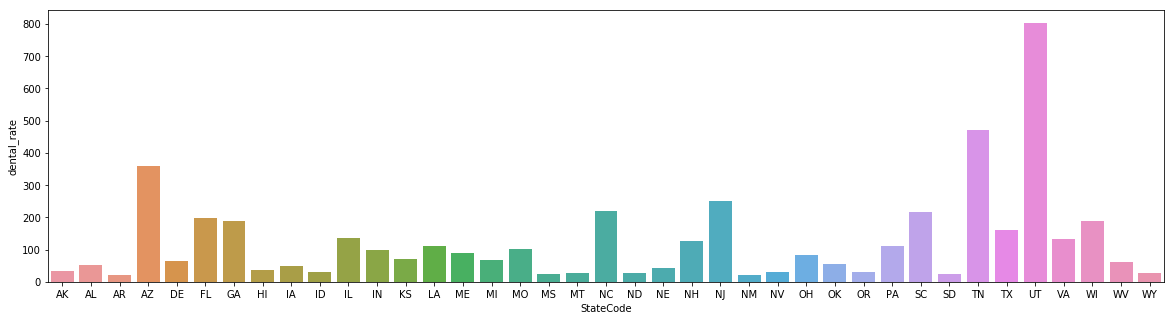

In [8]:
res = pd.read_sql("""select rate.statecode, avg(rate.individualrate) as dental_rate
                            from rate
                            inner join planattributes on rate.planid=substr(planattributes.planid, 1,14)
                            where planattributes.dentalonlyplan='Yes' and rate.individualrate !=999999 
                            group by rate.statecode
                            order by rate.statecode;""", conn)
fig, ax=plt.subplots(figsize=[20, 5])
sns.barplot(x='StateCode', y='dental_rate', data=res)

Age vs. rate analysis over all the plans:

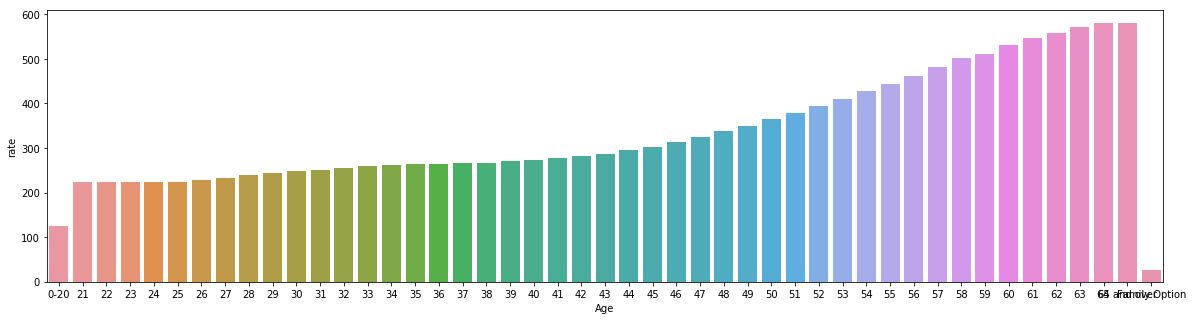

In [10]:
res = pd.read_sql("""select avg(individualrate) as rate, age
                        from rate
                        where individualrate !=999999
                        and businessyear = 2016
                        group by age; """, conn)

fig, ax=plt.subplots(figsize=[20, 5])
sns.barplot(x='Age', y='rate', data=res)

Age seems to positively impact the spike in the rates associated except for the family option which has lower rate than for individuals. It is expected as the family plan tends to cover more than 1 individual and thus the rate is divided among the co-payers.

#### Analyzing utility of MOOP in Plan Attributes

In [13]:
df = pd.read_excel("C:/Users/gauri/Downloads/Plan_Attributes_PUF.xlsx",encoding = 'utf-8')

In [14]:
df.head(5)

,BusinessYear,StateCode,IssuerId,SourceName,ImportDate,MarketCoverage,DentalOnlyPlan,TIN,StandardComponentId,PlanMarketingName,...,TEHBDedOutOfNetFamilyPerPerson,TEHBDedOutOfNetFamilyPerGroup,TEHBDedCombInnOonIndividual,TEHBDedCombInnOonFamilyPerPerson,TEHBDedCombInnOonFamilyPerGroup,IsHSAEligible,HSAOrHRAEmployerContribution,HSAOrHRAEmployerContributionAmount,URLForSummaryofBenefitsCoverage,PlanBrochure
0,2019,AK,38344,HIOS,2019-07-19 03:51:00,Individual,No,91-0499247,38344AK1060002,Premera Blue Cross Preferred Silver 4500,...,$0 per person,$0 per group,0,$0 per person,$0 per group,No,NaN,NaN,https://www.premera.com/documents/045636_2019.pdf,https://www.premera.com/documents/031040_2019.pdf
1,2019,AK,21989,HIOS,2018-10-16 03:20:00,SHOP (Small Group),Yes,93-0438772,21989AK0130001,"Delta Dental Premier, +2000, 100*/80/50, 50, PF",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.modahealth.com/pdfs/ben_sum/AK/190...
2,2019,AK,21989,HIOS,2018-10-16 03:20:00,Individual,Yes,93-0438772,21989AK0030001,Delta Dental Premier Plan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.modahealth.com/pdfs/plans/individu...
3,2019,AK,21989,HIOS,2018-10-16 03:20:00,Individual,Yes,93-0438772,21989AK0030001,Delta Dental Premier Plan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.modahealth.com/pdfs/plans/individu...
4,2019,AK,21989,HIOS,2018-10-16 03:20:00,SHOP (Small Group),Yes,93-0438772,21989AK0130002,"Delta Dental Premier, +2500, 100*/80/50, 50, PF",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.modahealth.com/pdfs/ben_sum/AK/190...


In [15]:
# Checking for NAs
df.isna().sum()

BusinessYear                                                        0
StateCode                                                           0
IssuerId                                                            0
SourceName                                                          0
ImportDate                                                          0
MarketCoverage                                                      0
DentalOnlyPlan                                                      0
TIN                                                                 0
StandardComponentId                                                 0
PlanMarketingName                                                   0
HIOSProductId                                                       0
HPID                                                            12853
NetworkId                                                           0
ServiceAreaId                                                       0
FormularyId         

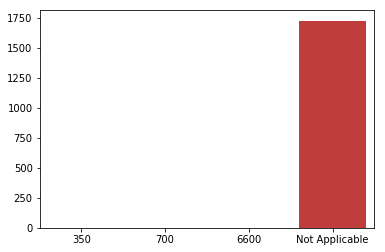

In [62]:
res = df.groupby(["MEHBOutOfNetIndividualMOOP"],as_index=False).count()
labels = list(res.MEHBOutOfNetIndividualMOOP)
counts = list(res.PlanId)
sns.barplot(x=labels,y=counts)

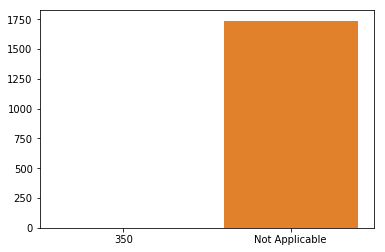

In [57]:
res = df.groupby(["MEHBCombInnOonIndividualMOOP"],as_index=False).count()
labels = list(res.MEHBCombInnOonIndividualMOOP)
counts = list(res.PlanId)
sns.barplot(x=labels,y=counts,col)

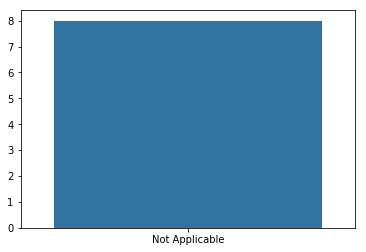

In [61]:
res = df.groupby(["DEHBCombInnOonIndividualMOOP"],as_index=False).count()
labels = list(res.DEHBCombInnOonIndividualMOOP)
counts = list(res.PlanId)
sns.barplot(x=labels,y=counts)

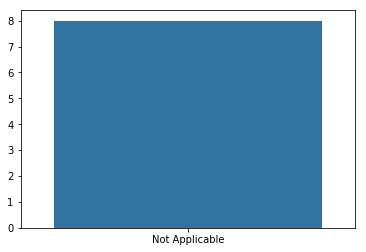

In [63]:
res = df.groupby(["DEHBOutOfNetIndividualMOOP"],as_index=False).count()
labels = list(res.DEHBOutOfNetIndividualMOOP)
counts = list(res.PlanId)
sns.barplot(x=labels,y=counts)

In [67]:
df.TEHBInnTier1IndividualMOOP.unique()

array([   0.,   nan, 6000., 1850., 7900., 7350., 7500., 5850.,  700.,
       7800., 6700., 6600., 3800., 1400.,  500., 6750., 5000., 4000.,
       6300., 1750.,  900., 6450., 7150., 2000., 2300., 1900., 6650.,
       6100., 2600., 1300., 1450., 2200.,  800., 1500., 5500., 6500.,
        600., 2500., 5750., 6550., 2550., 7050., 5325., 1000., 1675.,
        950., 7000., 2350., 1250., 3500., 6350., 1075., 5100.,  575.,
       5350., 1950.,  675., 7450., 4700., 7300., 1600., 3000., 4550.,
       5700., 3050.,  525.,  650., 7700., 1700.,  750., 2450., 5600.,
       6250., 4500., 4900., 5900., 4800., 2250., 7250., 7750., 2100.,
       7100., 1200., 5200., 7850., 1350., 2150.,  850., 6050., 3950.,
       6800., 1650., 4850., 4600., 7600., 6200., 2400., 1800., 7200.,
       1050., 1550., 5450., 4300., 3400.,  450., 6850., 5400., 3750.,
       7400., 2475., 5250., 3375., 1150.,  425., 4250., 2700., 3850.,
       3900., 3200., 1100.,  875., 7650., 4150.,  725., 1920., 5800.,
       5150., 4950.,

I considered MOOP as a useful criteria for Qualitative Analysis of plans but the columns for both MEHB (Medical EHB) and DEHB (Dental EHB) MOOPs are flooded with NaNs/ Not Applicable. However, interestingly, it is not NaNs for Total EHB MOOP columns.